In [140]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt

# GOOGLE.excel

In [141]:
df=pd.read_excel('GOOGL.xlsx')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600
...,...,...,...,...,...,...,...
248,2021-04-21,2272.050049,2280.000000,2244.820068,2278.350098,2278.350098,1160200
249,2021-04-22,2275.399902,2288.879883,2240.320068,2252.520020,2252.520020,1207300
250,2021-04-23,2267.000000,2306.120117,2261.250000,2299.929932,2299.929932,1453300
251,2021-04-26,2304.520020,2324.530029,2297.320068,2309.929932,2309.929932,1595200


In [142]:
df1=df[['Date','Close']]
df1

,Date,Close
0,2020-04-27,1270.859985
1,2020-04-28,1232.589966
2,2020-04-29,1342.180054
3,2020-04-30,1346.699951
4,2020-05-01,1317.319946
...,...,...
248,2021-04-21,2278.350098
249,2021-04-22,2252.520020
250,2021-04-23,2299.929932
251,2021-04-26,2309.929932


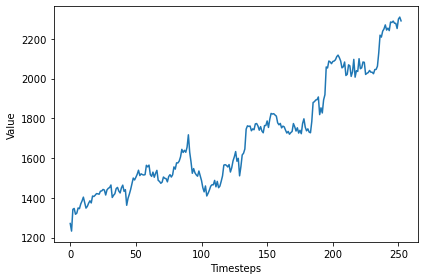

In [146]:
fig, ax = plt.subplots()
ax.plot(df1['Close'])
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

# Lets Check for stationary behaviour of data

In [147]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [149]:
ADF_result = adfuller(df1['Close'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: 0.16025048664771313
p-value: 0.9699419435913057


# since adf statistic is less positive and p value is greater than 0.05 the data is non-stationary

# Lets CHeck for Random Walk

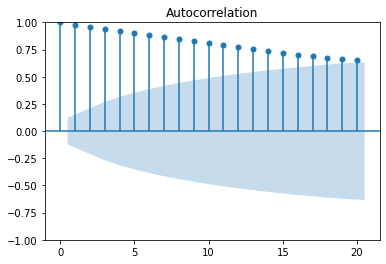

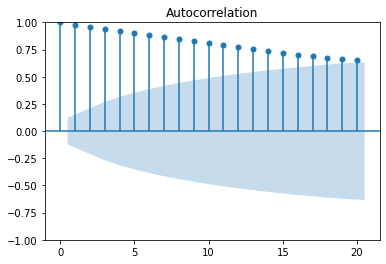

In [151]:
plot_acf(df1['Close'], lags=20)

# since the points are outside the shaded region we conclude that autocorrelation is significant hence its not a RANDOM WALk

# Historic Mean

In [157]:
x_train=df1['Close'].iloc[:248]
x_test=df1['Close'].iloc[248:]

In [174]:
new_df=df1[248:]
new_df['his_mean']=x_train.mean()
new_df

,Date,Close,his_mean
248,2021-04-21,2278.350098,1689.993184
249,2021-04-22,2252.520020,1689.993184
250,2021-04-23,2299.929932,1689.993184
251,2021-04-26,2309.929932,1689.993184
252,2021-04-27,2290.979980,1689.993184


In [175]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
y_train=new_df['Close']
y_test=new_df['his_mean']
print('MAPE =',round(100*mean_absolute_percentage_error(y_train, y_test),2))
print('MSE =',round(100*mean_squared_error(y_train, y_test),2))
print('RMSE =',round(100*(mean_squared_error(y_train, y_test,squared=False)),2))

MAPE = 26.08
MSE = 35602596.7
RMSE = 59667.91


# Last Value

In [176]:
x_train=df1['Close'][:248]
a=x_train[-1:].iloc[0]
a

2279.01001

In [177]:
last_df=df1[248:]
last_df['Last_Value']=a
last_df


,Date,Close,Last_Value
248,2021-04-21,2278.350098,2279.01001
249,2021-04-22,2252.520020,2279.01001
250,2021-04-23,2299.929932,2279.01001
251,2021-04-26,2309.929932,2279.01001
252,2021-04-27,2290.979980,2279.01001


In [178]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
y_train=last_df['Close']
y_test=last_df['Last_Value']
print('MAPE =',round(100*mean_absolute_percentage_error(y_train, y_test),2))
print('MSE =',round(100*mean_squared_error(y_train, y_test),2))
print('RMSE =',round(100*(mean_squared_error(y_train, y_test,squared=False)),2))

MAPE = 0.8
MSE = 44782.4
RMSE = 2116.19


# Last Value with next time stamp

In [179]:
x_train=df1['Close'][:248]
a=x_train[-1:].iloc[0]
a

2279.01001

In [180]:
next_ts=df1[248:]
next_ts


,Date,Close
248,2021-04-21,2278.350098
249,2021-04-22,2252.520020
250,2021-04-23,2299.929932
251,2021-04-26,2309.929932
252,2021-04-27,2290.979980


In [181]:
def lagging_column(next_ts, Close, lag_periods=1):
    next_ts['next_value'] = next_ts['Close'].shift(lag_periods)
    return next_ts

In [182]:
next_ts= lagging_column(next_ts, 'Close', lag_periods=1)

In [183]:
next_ts['next_value']=next_ts['next_value'].fillna(a)
next_ts

,Date,Close,next_value
248,2021-04-21,2278.350098,2279.010010
249,2021-04-22,2252.520020,2278.350098
250,2021-04-23,2299.929932,2252.520020
251,2021-04-26,2309.929932,2299.929932
252,2021-04-27,2290.979980,2309.929932


In [184]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
y_train=next_ts['Close']
y_test=next_ts['next_value']
print('MAPE =',round(100*mean_absolute_percentage_error(y_train, y_test),2))
print('MSE =',round(100*mean_squared_error(y_train, y_test),2))
print('RMSE =',round(100*(mean_squared_error(y_train, y_test,squared=False)),2))

MAPE = 0.9
MSE = 67488.58
RMSE = 2597.86


# Last One Month Mean

In [185]:
x_train=df1['Close'][:248]
a=x_train[218:].mean()
a

2133.6106486

In [186]:
m_df=df1[248:]
m_df['Month_Mean']=a
m_df

,Date,Close,Month_Mean
248,2021-04-21,2278.350098,2133.610649
249,2021-04-22,2252.520020,2133.610649
250,2021-04-23,2299.929932,2133.610649
251,2021-04-26,2309.929932,2133.610649
252,2021-04-27,2290.979980,2133.610649


In [187]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
y_train=m_df['Close']
y_test=m_df['Month_Mean']
print('MAPE =',round(100*mean_absolute_percentage_error(y_train, y_test),2))
print('MSE =',round(100*mean_squared_error(y_train, y_test),2))
print('RMSE =',round(100*(mean_squared_error(y_train, y_test,squared=False)),2))

MAPE = 6.67
MSE = 2372092.94
RMSE = 15401.6


# forecast plotting

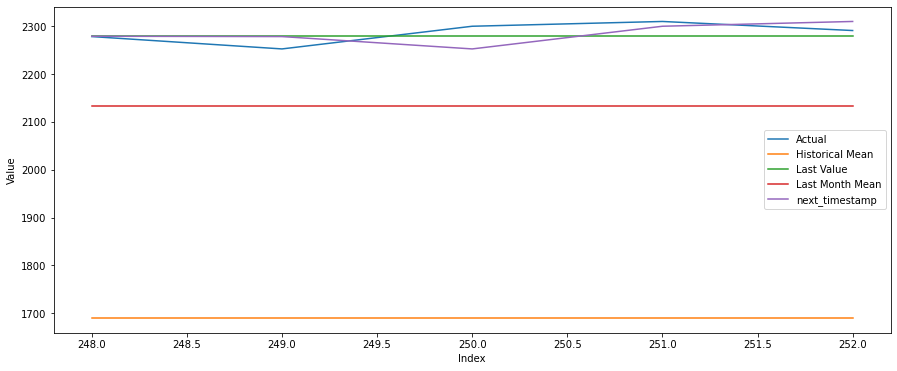

In [188]:
plt.figure(figsize=(15, 6)) 
plt.plot(new_df['Close'], label='Actual')
plt.plot(new_df['his_mean'], label='Historical Mean')
plt.plot(last_df['Last_Value'], label='Last Value ')
plt.plot(m_df['Month_Mean'], label='Last Month Mean')
plt.plot(next_ts['next_value'], label='next_timestamp')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()